In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re
import os
from constants import UNIVERSITIES, ENROLLMENT_FILES_LIST, FUNDING_FILES_LIST

In [2]:
DATA_PATH = r"C:\Users\iveta\OneDrive\Desktop\magistras\duomenys"
FINANCING_DATA_PATH = DATA_PATH + "/finansavimas"
ENROLLMENT_DATA_PATH = DATA_PATH  + "/istojusiu_skaicius"
PROJECTS_DATA_PATH = DATA_PATH + "/projektai"
FOREIGN_STUDENTS_DATA_PATH = DATA_PATH + "/uzsienio_pilieciai.xlsx"
GRADUATES_DATA_PATH = DATA_PATH + "/absolventu_skaicius.xlsx"
BASE_TUITION_FEES_DATA_PATH = DATA_PATH + "/normines_studiju_kainos"

In [3]:
universities_lower = [uni.lower() for uni in UNIVERSITIES]

## Graduates

In [233]:
graduates = pd.read_excel(GRADUATES_DATA_PATH, skiprows=2, usecols=[1, 2], names=["Year", "Graduates"])

C:\Users\iveta\PycharmProjects\magistras\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [234]:
graduates_df = pd.DataFrame(graduates)
graduates_df.head()

,Year,Graduates
0,2024,8118
1,2023,7802
2,2022,7715
3,2021,8456
4,2020,9331


([<matplotlib.axis.XTick at 0x1fdd5338050>,
 [Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

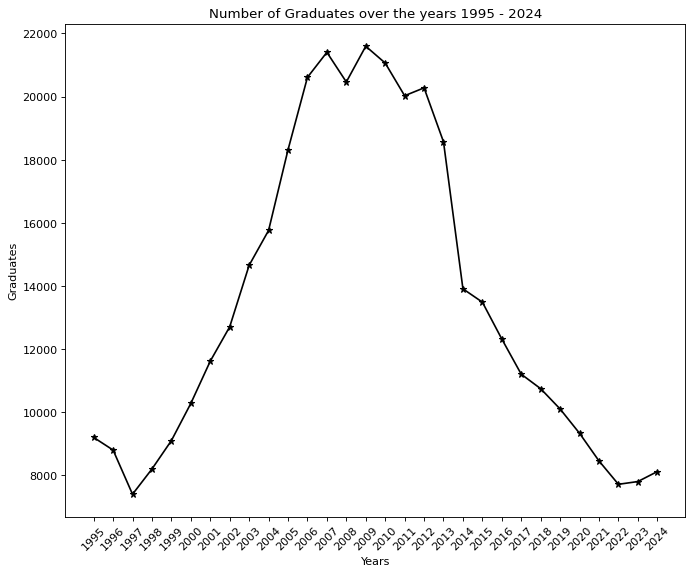

In [235]:
figure(figsize=(10, 8), dpi=80)
plt.plot(graduates_df['Year'], graduates_df['Graduates'], marker='*', color="black"
                                                                            )
plt.xlabel('Years')
plt.ylabel('Graduates')
plt.title("Number of Graduates over the years 1995 - 2024")
plt.xticks(range(1995, 2025), rotation=45)

In [236]:
min_index = graduates_df['Graduates'].idxmin()
print("Smallest number of graduates were in ", graduates_df.loc[min_index, 'Year'], " with ",graduates_df.loc[min_index, 'Graduates'], ' graduates')

max_index = graduates_df['Graduates'].idxmax()
print("Largest number of graduates were in ", graduates_df.loc[max_index, 'Year'], " with ",graduates_df.loc[max_index, 'Graduates'], ' graduates')

Smallest number of graduates were in  1997  with  7400  graduates
Largest number of graduates were in  2009  with  21594  graduates


In [237]:
graduates_df = graduates_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
graduates_df['YoY_change'] = graduates_df['Graduates'].diff()
graduates_df['YoY_%'] = graduates_df['Graduates'].pct_change() * 100

In [238]:
graduates_df

,Year,Graduates,YoY_change,YoY_%
0,1995,9200,NaN,NaN
1,1996,8800,-400.0,-4.347826
2,1997,7400,-1400.0,-15.909091
3,1998,8200,800.0,10.810811
4,1999,9100,900.0,10.975610
5,2000,10278,1178.0,12.945055
6,2001,11617,1339.0,13.027826
7,2002,12705,1088.0,9.365585
8,2003,14654,1949.0,15.340417
9,2004,15758,1104.0,7.533779


## Foreign students

In [240]:
foreigns = pd.read_excel(FOREIGN_STUDENTS_DATA_PATH, skiprows=2, usecols=[1, 2], names=["Year", "Students"])

C:\Users\iveta\PycharmProjects\magistras\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [241]:
foreigns_df = pd.DataFrame(foreigns)
foreigns_df = foreigns_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
foreigns_df.head()

,Year,Students
0,2005-2006,1198
1,2006-2007,1872
2,2007-2008,2955
3,2008-2009,3844
4,2009-2010,3946


In [242]:
foreigns_df

,Year,Students
0,2005-2006,1198
1,2006-2007,1872
2,2007-2008,2955
3,2008-2009,3844
4,2009-2010,3946
5,2010-2011,3924
6,2011-2012,4161
7,2012-2013,4554
8,2013-2014,5104
9,2014-2015,5646


Text(0.5, 1.0, 'Number of Foreign Students over the years 1995 - 2024')

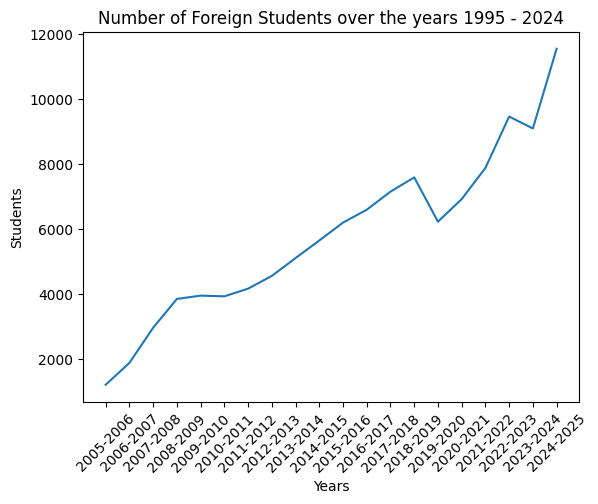

In [243]:
plt.plot(foreigns_df['Year'], foreigns_df['Students'])
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Students')
plt.title("Number of Foreign Students over the years 1995 - 2024")

## Enrollment

In [245]:
COMBINED_NUMBER_DATA_PATH = ENROLLMENT_DATA_PATH + '/bendri_skaiciai.xlsx'
students = pd.read_excel(COMBINED_NUMBER_DATA_PATH, skiprows=2, usecols=[1, 3, 4], names=["Year", "Bachelors", "Masters"])

C:\Users\iveta\PycharmProjects\magistras\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [246]:
students_df = pd.DataFrame(students)
students_df = students_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
students_df['Students'] = students_df['Bachelors'] + students_df['Masters']
students_df = students_df.drop(['Bachelors', 'Masters'], axis=1)
students_df.head()

,Year,Students
0,2000,33981
1,2001,38115
2,2002,39770
3,2003,42668
4,2004,41602


In [247]:
students_df['YoY_change'] = students_df['Students'].diff()
students_df['YoY_%'] = students_df['Students'].pct_change() * 100

([<matplotlib.axis.XTick at 0x1fdd5960410>,
 [Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

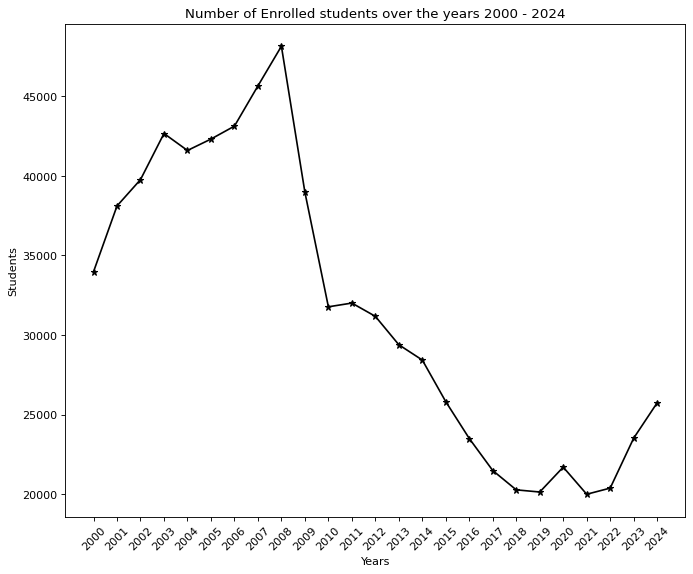

In [248]:
figure(figsize=(10, 8), dpi=80)

plt.plot(students_df['Year'], students_df['Students'], marker='*', color="black")

plt.xlabel('Years')
plt.ylabel('Students')
plt.title("Number of Enrolled students over the years 2000 - 2024")
plt.xticks(range(2000, 2025), rotation=45)

### College and vocational school enrollment

In [250]:
college_enrollment_path = ENROLLMENT_DATA_PATH + '/kolegijos.xlsx'
vocational_enrollment_path = ENROLLMENT_DATA_PATH + '/profesines_mokyklos.xlsx'

In [251]:
college_enrollment = pd.read_excel(college_enrollment_path, skiprows=2, usecols=[1, 2], names=["Year", "Students"])
vocational_enrollment = pd.read_excel(vocational_enrollment_path, skiprows=3, usecols=[1, 2], names=["Year", "Students"])
college_enrollment_df = pd.DataFrame(college_enrollment)
college_enrollment_df = college_enrollment_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
vocational_enrollment_df = pd.DataFrame(vocational_enrollment)
vocational_enrollment_df = vocational_enrollment_df.sort_values(by='Year', ascending=True).reset_index(drop=True)

C:\Users\iveta\PycharmProjects\magistras\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\iveta\PycharmProjects\magistras\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


([<matplotlib.axis.XTick at 0x1fdd598f4d0>,
 [Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

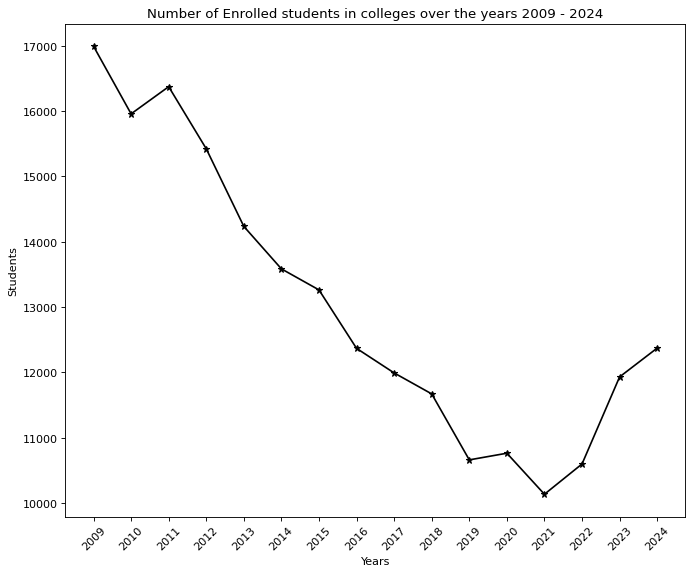

In [252]:
figure(figsize=(10, 8), dpi=80)

plt.plot(college_enrollment_df['Year'], college_enrollment_df['Students'], marker='*', color="black")

plt.xlabel('Years')
plt.ylabel('Students')
plt.title("Number of Enrolled students in colleges over the years 2009 - 2024")
plt.xticks(range(2009, 2025), rotation=45)

([<matplotlib.axis.XTick at 0x1fdd5a01d10>,
 [Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

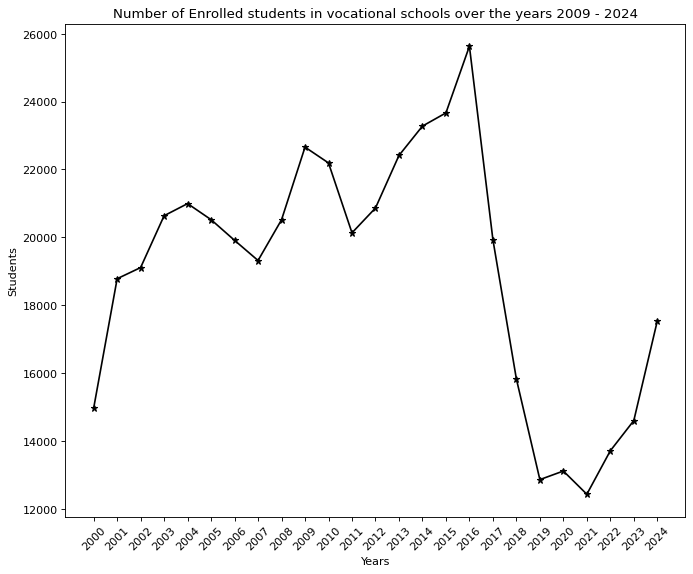

In [253]:
figure(figsize=(10, 8), dpi=80)

plt.plot(vocational_enrollment_df['Year'], vocational_enrollment_df['Students'], marker='*', color="black")

plt.xlabel('Years')
plt.ylabel('Students')
plt.title("Number of Enrolled students in vocational schools over the years 2009 - 2024")
plt.xticks(range(2000, 2025), rotation=45)

## Enrollment in each university

In [4]:
def clean_number(x):
    if pd.isna(x):
        return None
    if isinstance(x, str):
        x = str(x)
        x = x.replace("\xa0", "")
        x = x.replace(" ", "")
        x = x.replace(",", ".")
        x = re.sub(r"[^\d.]", "", x)
    try:
        return int(x)
    except ValueError:
        return None

In [5]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).strip()
    text = text.replace("\xa0", " ")
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text

In [6]:
def read_excel_data(file_path: str, universities_lower: list, skiprows: int, usecols: list, columnames: list):
    print(f"\nReading file: {file_path}")

    df = None
    for skip in range(0, 6):
        temp = pd.read_excel(file_path, skiprows=skip, usecols=usecols, names=columnames)
        if temp['University'].astype(str).str.contains('universitet', case=False).any():
            df = temp
            break
    if df is None:
        df = pd.read_excel(file_path, skiprows=skiprows, usecols=usecols, names=columnames)


    df['University'] = df['University'].apply(clean_text)

    df = df[~df['University'].isin(['universitetai', 'kolegijos'])]
    df = df[df['University'] != ""]

    filtered_data = df[df['University'].isin(universities_lower)]

    missing = set(universities_lower) - set(filtered_data['University'])
    if missing:
        print("Missing universities in this file:", missing)

    return filtered_data

In [7]:
def plot_data_per_university(df, title, feature, save_dir='images'):
    os.makedirs(save_dir, exist_ok=True)

    for uni in df["University"].unique():
        uni_data = df[df["University"] == uni]
        fig, ax = plt.subplots(figsize=(6, 4))

        ax.plot(
            uni_data["Year"],
            uni_data[feature],
            marker="o",
            linewidth=2,
            color="black"
        )

        ax.set_title(f"{uni.title()} {title}", fontsize=12)
        ax.set_xlabel("Year")
        ax.set_ylabel(title)
        ax.grid(True, linestyle="--", alpha=0.7)
        fig.tight_layout()

        filename = f"{uni.replace('/', '_').replace(':', '_').replace(' ', '_')}.png"
        filepath = os.path.join(save_dir, filename)

        plt.savefig(filepath)
        plt.close()

In [26]:
def plot_data_all_universities(df, title, feature, save_dir="images"):
    import os
    import matplotlib.pyplot as plt

    os.makedirs(save_dir, exist_ok=True)

    fig, ax = plt.subplots(figsize=(8, 5))
    df = df[~df["Year"].isin([2026, 2027])]
    for uni in df["University"].unique():
        uni_data = df[df["University"] == uni]

        ax.plot(
            uni_data['Year'],
            uni_data[feature],
            marker="o",
            linewidth=2,
            label=uni
        )

    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel('Funding (millions)')
    ax.grid(True, linestyle="--", alpha=0.7)

    ax.legend(
        fontsize=8,
        loc="best",
        frameon=True
    )

    fig.tight_layout()

    filename = f"all_universities_{feature}.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath)
    plt.close()

In [9]:
all_years = []
for file in ENROLLMENT_FILES_LIST:
    file_path = ENROLLMENT_DATA_PATH + file
    data = read_excel_data(file_path, universities_lower, skiprows=4, usecols=[0, 1], columnames=['University', "Enrolled Students"])
    data["Year"] = re.search(r"\d{4}", file).group()
    all_years.append(data)

combined_enrolled = pd.concat(all_years, ignore_index=True)


Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2016.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2017.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2018.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2019.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2020.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2021.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2022.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2023.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/istojusiu_skaicius/LAMA_BPO_2024.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomeny

In [10]:
combined_enrolled["Year"] = combined_enrolled["Year"].astype(int)
combined_enrolled["Enrolled Students"] = combined_enrolled["Enrolled Students"].apply(clean_number)
combined_enrolled = combined_enrolled.sort_values(by=["University", "Year"])

In [267]:
combined_enrolled

,University,Enrolled Students,Year
0,kauno technologijos universitetas,1546,2016
10,kauno technologijos universitetas,1596,2017
20,kauno technologijos universitetas,1332,2018
30,kauno technologijos universitetas,1180,2019
40,kauno technologijos universitetas,1150,2020
...,...,...,...
59,vytauto didžiojo universitetas,876,2021
69,vytauto didžiojo universitetas,843,2022
79,vytauto didžiojo universitetas,897,2023
89,vytauto didžiojo universitetas,905,2024


In [11]:
# Plot enrolled students for each university
title = " Number of Enrolled Students"
plot_data_per_university(combined_enrolled, title, feature="Enrolled Students")

## Finances

In [12]:
all_years = []
for file in FUNDING_FILES_LIST:
    file_path = FINANCING_DATA_PATH + file
    data = read_excel_data(file_path, universities_lower, skiprows=1, usecols=[0, 1], columnames=['University', "Funding"])
    data["Year"] = re.search(r"\d{4}", file).group()
    all_years.append(data)

combined_funding = pd.concat(all_years, ignore_index=True)


Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2016.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2017.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2018.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2019.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2020.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2021.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2022.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2023.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FINANSAVIMAS_2024.xlsx

Reading file: C:\Users\iveta\OneDrive\Desktop\magistras\duomenys/finansavimas/FIN

In [13]:
combined_funding["Year"] = combined_funding["Year"].astype(int)
combined_funding["Funding"] = combined_funding["Funding"].apply(clean_number)
combined_funding = combined_funding.sort_values(by=["University", "Year"])

In [271]:
combined_funding

,University,Funding,Year
2,kauno technologijos universitetas,28679,2018
18,kauno technologijos universitetas,30723,2019
22,kauno technologijos universitetas,33396,2020
32,kauno technologijos universitetas,35529,2021
42,kauno technologijos universitetas,42636,2022
...,...,...,...
51,vytauto didžiojo universitetas,37899,2023
61,vytauto didžiojo universitetas,47769,2024
71,vytauto didžiojo universitetas,58413,2025
81,vytauto didžiojo universitetas,59695,2026


In [27]:
title = " Funding Per University"
combined_funding['Funding_mil'] = combined_funding['Funding']/1000
plot_data_all_universities(combined_funding, title, feature="Funding_mil")

## Tuition fees

In [4]:
BASE_TUITION_FEES = [
    "/NORMINES_KAINOS_2018.xlsx",
    "/NORMINES_KAINOS_2019.xlsx",
    "/NORMINES_KAINOS_2020.xlsx",
    "/NORMINES_KAINOS_2021.xlsx",
    "/NORMINES_KAINOS_2022.xlsx",
    "/NORMINES_KAINOS_2023.xlsx",
    "/NORMINES_KAINOS_2024.xlsx",
    "/NORMINES_KAINOS_2025.xlsx",
]

In [5]:
all_years = []
for file in BASE_TUITION_FEES:
    file_path = BASE_TUITION_FEES_DATA_PATH + file
    df = pd.read_excel(file_path, skiprows=4, usecols=[1, 2, 4], names=['Study area', 'Bachelors fee', 'Masters fee'])

    df["Year"] = re.search(r"\d{4}", file).group()  # extract year from filename
    all_years.append(df)

combined_fees = pd.concat(all_years, ignore_index=True).dropna()

In [8]:
combined_fees = combined_fees.sort_values(by=["Study area", "Year"])
combined_fees['Bachelors fee'] = combined_fees['Bachelors fee'].apply(clean_number)
combined_fees['Masters fee'] = combined_fees['Masters fee'].apply(clean_number)

In [9]:
combined_fees

,Study area,Bachelors fee,Masters fee,Year
3,Menas,3294,4304,2018
7,Menas,3761,4903,2019
11,Menas,4273,5556,2020
15,Menas,4664,6025,2021
20,Menas,4795,6187,2022
26,Menas,5065,6495,2023
32,Menas,5204,6634,2024
39,Menas,5555,6985,2025
2,"Muzika, medicina",4045,5055,2018
6,"Muzika, medicina",4619,5761,2019


In [10]:
combined_fees.to_excel('Tuition fees.xlsx')

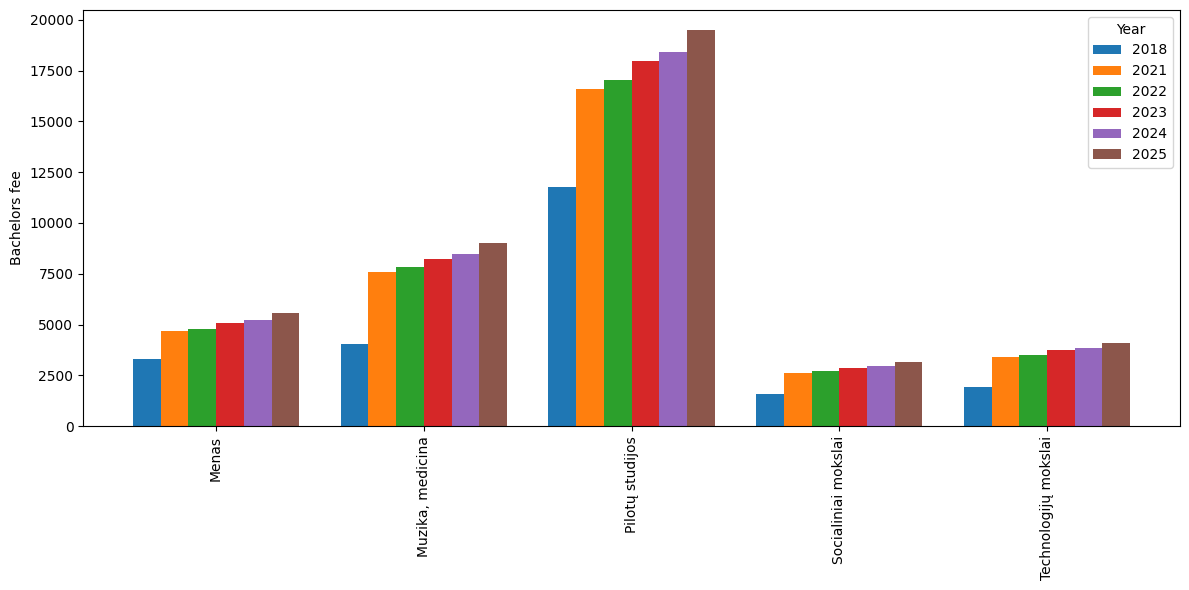

In [277]:
years = sorted(combined_fees['Year'].unique())
study_areas = combined_fees['Study area'].unique()

x = np.arange(len(study_areas))
width = 0.8 / len(years)

fig, ax = plt.subplots(figsize=(12,6))

for i, year in enumerate(years):
    fees = combined_fees[combined_fees['Year'] == year].set_index('Study area').reindex(study_areas)['Bachelors fee']
    ax.bar(x + i*width, fees, width=width, label=str(year))

ax.set_xticks(x + width*(len(years)-1)/2)
ax.set_xticklabels(study_areas, rotation=90)
ax.set_ylabel('Bachelors fee')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

In [278]:
for area in study_areas:
    fee_2018_bac = combined_fees.loc[
        (combined_fees['Study area'] == area) & (combined_fees['Year'] == '2018'),
        'Bachelors fee'
    ].values
    fee_2025_bac = combined_fees.loc[
        (combined_fees['Study area'] == area) & (combined_fees['Year'] == '2025'),
        'Bachelors fee'
    ].values
    pct_change_bac = (fee_2025_bac - fee_2018_bac) / fee_2018_bac * 100

    fee_2018_mas = combined_fees.loc[
        (combined_fees['Study area'] == area) & (combined_fees['Year'] == '2018'),
        'Masters fee'
    ].values
    fee_2025_mas = combined_fees.loc[
        (combined_fees['Study area'] == area) & (combined_fees['Year'] == '2025'),
        'Masters fee'
    ].values
    pct_change_mas = (fee_2025_mas - fee_2018_mas) / fee_2018_mas * 100

    print('Tuition fee for a Bachelors degree in ', area, ' changed by ', round(pct_change_bac[0], 2), '%')
    print('Tuition fee for a Masters degree in ', area, ' changed by ', round(pct_change_mas[0], 2), '%')
    print('---------------------------------------')


Tuition fee for a Bachelors degree in  Menas  changed by  68.64 %
Tuition fee for a Masters degree in  Menas  changed by  62.29 %
---------------------------------------
Tuition fee for a Bachelors degree in  Muzika, medicina  changed by  122.37 %
Tuition fee for a Masters degree in  Muzika, medicina  changed by  106.23 %
---------------------------------------
Tuition fee for a Bachelors degree in  Pilotų studijos  changed by  66.02 %
Tuition fee for a Masters degree in  Pilotų studijos  changed by  64.08 %
---------------------------------------
Tuition fee for a Bachelors degree in  Socialiniai mokslai  changed by  99.12 %
Tuition fee for a Masters degree in  Socialiniai mokslai  changed by  76.81 %
---------------------------------------
Tuition fee for a Bachelors degree in  Technologijų mokslai  changed by  113.85 %
Tuition fee for a Masters degree in  Technologijų mokslai  changed by  88.95 %
---------------------------------------
